In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sleep_data.csv')

In [34]:
df.head()

,Date,Sleep Hours
0,08/05/24 19:15,7.5
1,08/06/24 20:25,6.0
2,08/07/24 18:35,5.5
3,08/08/24 22:45,9.0
4,08/09/24 23:55,10.0


In [35]:
na = df.isna()
na

,Date,Sleep Hours
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
89,True,True
90,False,False
91,False,False
92,False,False


In [70]:
df.dropna(inplace=True)

In [71]:
df.isna()

,Date,Sleep Hours,Day of Week,Is Weekend
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
89,False,False,False,False
90,False,False,False,False
91,False,False,False,False
92,False,False,False,False


In [37]:
df.describe()

,Sleep Hours
count,85.000000
mean,7.916471
std,1.343046
min,5.500000
25%,6.900000
50%,8.000000
75%,9.000000
max,10.900000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         85 non-null     object 
 1   Sleep Hours  85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


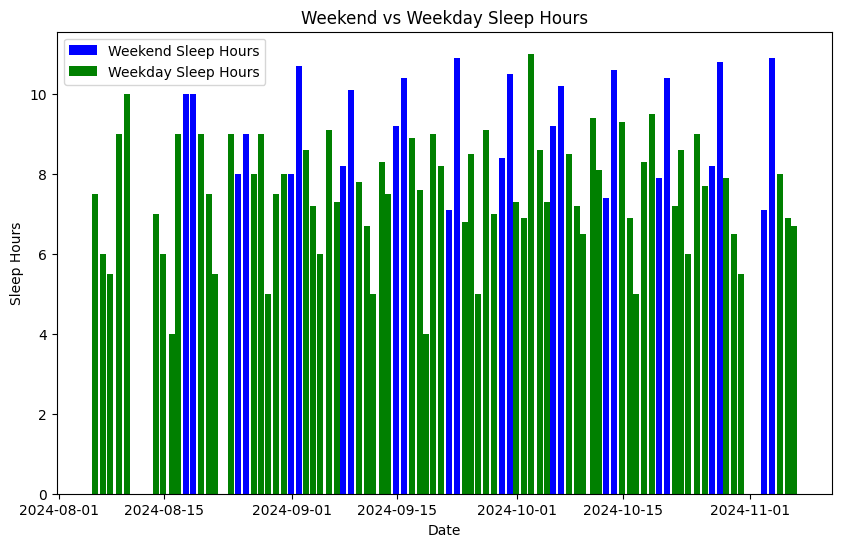

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column for the day of the week
df['Day of Week'] = df['Date'].dt.day_name()

# Add a new column to indicate if the day is a weekend
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday'])

# Separate weekend and weekday sleep hours
weekend_sleep = df[df['Is Weekend'] == True]
weekday_sleep = df[df['Is Weekend'] == False]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(weekend_sleep['Date'], weekend_sleep['Sleep Hours'], label='Weekend Sleep Hours', color='blue')
plt.bar(weekday_sleep['Date'], weekday_sleep['Sleep Hours'], label='Weekday Sleep Hours', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.title('Weekend vs Weekday Sleep Hours')
plt.legend()
plt.show()

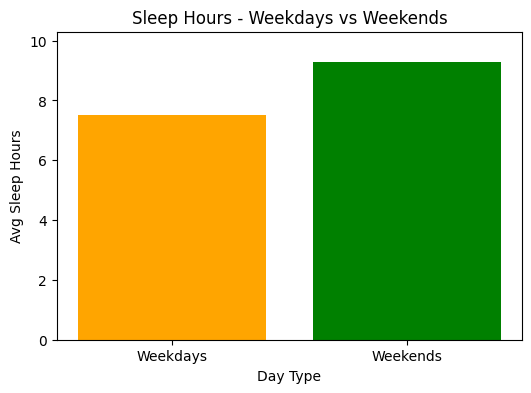

In [66]:
avg_weekend_sleep = df[df['Is Weekend'] == True]['Sleep Hours'].mean()
avg_weekday_sleep = df[df['Is Weekend'] == False]['Sleep Hours'].mean()

# Data for the bar plot
labels = ['Weekdays', 'Weekends']
average_sleep_values = [avg_weekday_sleep, avg_weekend_sleep]

# Plotting with plt.bar()
plt.figure(figsize=(6, 4))
plt.bar(labels, average_sleep_values, color=['orange', 'green'])


plt.xlabel('Day Type')
plt.ylabel('Avg Sleep Hours')
plt.title('Sleep Hours - Weekdays vs Weekends')
# plt.ylim(0, max(average_sleep_values) + 1)
plt.show()

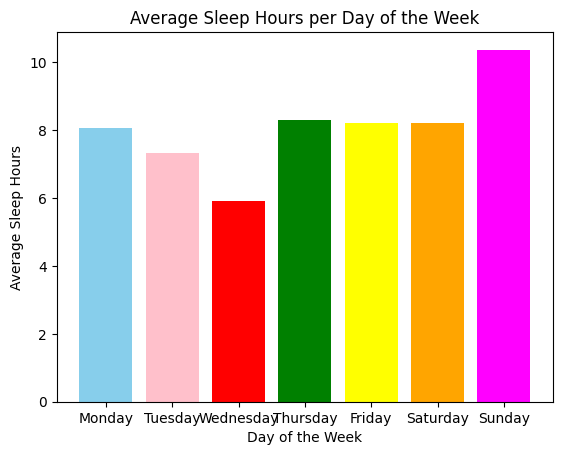

In [62]:
avg_sleep_per_day = df.groupby('Day of Week')['Sleep Hours'].mean()

# Sort the days of the week in order (since the default sorting is alphabetical)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sleep_per_day = avg_sleep_per_day[day_order]

# Plotting

plt.bar(avg_sleep_per_day.index, avg_sleep_per_day, color=['skyblue','pink','red','green','yellow','orange','magenta'])


plt.xlabel('Day of the Week')
plt.ylabel('Average Sleep Hours')
plt.title('Average Sleep Hours per Day of the Week')
plt.show()